In [2]:
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

## 2. Problem 1: Small dataset
### 1. Loading the data
1. Load the data in X.npy. How many cells and genes are in this data set? Print the no. of cells (no. of rows) and the no. of genes (no. of columns).
2. What is the value of the largest entry in the first column? (Enter accurate to at least 5 decimal places) 

In [3]:
# load the data
path = "../01_data/data/p1/"
X = np.load(path + "X.npy")

print("1: The shape of X: {}".format(X.shape))
print("2: Maximum entry of the first column: {:.7}".format(X[:,0].max()))

1: The shape of X: (511, 45768)
2: Maximum entry of the first column: 11.9414


### 2. Transform the Data
Due to the presence of genes with extremely high magnitudes of expression in only a few cells, it is common to apply a log-transform to the data, that is, to apply the transform $log_2(x+1)$. Apply this transform to each entry in the raw data.
What is the value of the largest entry in the first column of the processed data matrix? 

In [4]:
X_trans = np.log2(X+1)
print("Maximum entry of the first column: {:.7}".format(X_trans[:,0].max()))

Maximum entry of the first column: 3.693922


### 3. Principal Components and Explained Variance

For both the given raw data and the processed version computed in the previous part, compute the principal components.

*Python tip*: Use PCA() from scikit-learn. See https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

For both the raw data and processed version, what **percentage of the variance of the raw and the log-transformed data** is explained by the first principal component? What  Enter an answer between $0$ and $1$.

*Grader note*: The grader will accept both the percentage or the value between and as correct (e.g. if the answer if 12%, then both 12 and 0.12 will be accepted as correct.)

*Python tip*: Use explained_variance_ratio_ in PCA. 

How many PC's are needed to explain 85% of the variance for both raw and processed data? To get a better idea of how the explained variance grow as more PCs are included, plot the cumulative explained variance versus number of PCs.

*Python tip*: Use np.cumsum() on the explained variance ratio. 

In [5]:
pca = PCA(n_components=100)
X_PCA = pca.fit(X)
print("Raw data: Percentage of the variance (1st PC): {}".format(X_PCA.explained_variance_ratio_[0]))
print("Raw data: Number of needed PC's for explaining 85% of variance: {}".format(np.where(np.cumsum(X_PCA.explained_variance_ratio_) >= 0.85)[0][0]))

Raw data: Percentage of the variance (1st PC): 0.42779670983572804
Raw data: Number of needed PC's for explaining 85% of variance: 35


In [6]:
pca_trans = PCA(n_components=500)
X_trans_PCA = pca_trans.fit(X_trans)
print("Log-transformed data: Percentage of the variance (1st PC): {}".format(X_trans_PCA.explained_variance_ratio_[0]))
print("Log-transformed data: Number of needed PC's for explaining 85% of variance: {}".format(np.where(np.cumsum(X_trans_PCA.explained_variance_ratio_) >= 0.85)[0][0]))

Log-transformed data: Percentage of the variance (1st PC): 0.13887564870826183
Log-transformed data: Number of needed PC's for explaining 85% of variance: 338


### 4. Plotting without Visualization Technique

As mentioned above, we now start working with the log-transformed data.

We first try to visualize the data with no specialized techniques. Make a scatterplot with the first and second coordinates of the data as the axes.

Which of the following plots has the most similar characteristic to the visualization you obtain?

Warning: In the following 4 problems, the options in the multiple choices are the same. Be sure to scroll to the right place to answer each question. 

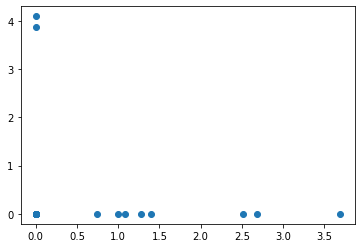

In [7]:
plt.scatter(X_trans[:,0], X_trans[:,1])

###  5. PCA

Now find the top two principal components, and make a scatterplot of the projections of the data onto these two PC's.

Which of the following plots has the most similar characteristic to the visualization you obtain?

**Warning**: In the following problems, the options in the multiple choices are the same. Be sure to scroll to the right place to answer each question. 

<function matplotlib.pyplot.show(close=None, block=None)>

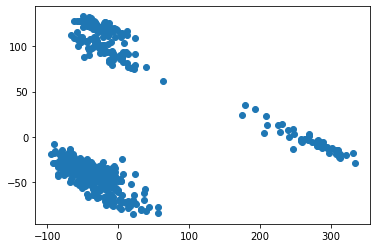

In [8]:
# overwriting old variables for simplicity's sake
pca_trans = PCA(n_components=50)
X_trans_PCA = pca_trans.fit_transform(X_trans) 
plt.scatter(x=X_trans_PCA[:,0], y=X_trans_PCA[:,1])
plt.show

How many visually distinct clusters are there? 

Number of visually distinct clusters by PCA: 3

### 6. MDS

Use the sklearn implementation of MDS to visualize the data in two dimensions.

Which of the following plots has the most similar characteristic to the visualization you obtain?

**Warning**: In the following problems, the options in the multiple choices are the same. Be sure to scroll to the right place to answer each question. 

In [9]:
mds = MDS(n_components=2)
X_trans_MDS = mds.fit_transform(X_trans)

<function matplotlib.pyplot.show(close=None, block=None)>

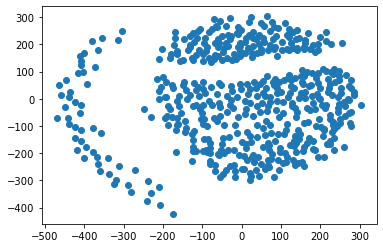

In [10]:
plt.scatter(X_trans_MDS[:,1], X_trans_MDS[:,0])
plt.show

How many visually distinct clusters are there? (Do not treat single outliers as a cluster.)

Number of visually distinct clusters by MDS: 3

### 7. T-SNE

Project the data onto the top $50$ PC's and run T-SNE with a perplexity value of $40$ on the projected data to visualize the data in two dimensions.

*Python tip*: Use TSNE from sklearn.manifold.

Which of the following plots looks closest to the one you obtained? 

In [11]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40)
X_trans_TSNE = tsne.fit_transform(X_trans_PCA[:,0:49])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 511 samples in 0.000s...
[t-SNE] Computed neighbors for 511 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 511 / 511
[t-SNE] Mean sigma: 18.598001
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.602699
[t-SNE] KL divergence after 1000 iterations: 0.401887


<function matplotlib.pyplot.show(close=None, block=None)>

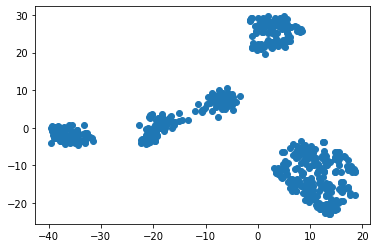

In [12]:
plt.scatter(X_trans_TSNE[:,0], X_trans_TSNE[:,1])
plt.show

How many visually distinct clusters are there?

Number of visually distinct clusters by T-SNE: 5

### 8. Visualizing K-means Clustering

As above, we continue to use the **log-transformed data projected onto the top $50$ PC's** .

Run K-Means on the projected data with the number of clusters by selected by looking at the T-SNE plot.

Redo the PCA, MDS, and T-SNE plots from previous part, but now with colors representing the different cluster identities (e.g. use 10 colors if there are 10 clusters).

1. Consider the clusters that you can distinguish visually in the PCA plot. What is the maximum number of K-means clusters (i.e maximum number of colors) in one visual cluster? Ignore outliers. 

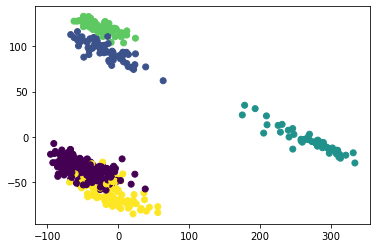

In [13]:
X_trans_KMeans = KMeans(n_clusters=5, n_init=10).fit_predict(X_trans_PCA[:,0:49])
plt.scatter(X_trans_PCA[:,0], X_trans_PCA[:,1], c=X_trans_KMeans)

Number of visually distict clusters within one point cloud: 2

2. Consider the clusters that you can distinguish visually in the MDS plot. What is the maximum number of K-means clusters (colors) in one visual cluster in the MDS plot? Ignore outliers. 

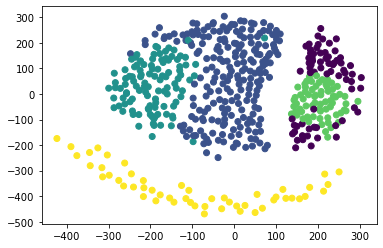

In [14]:
X_trans_KMeans = KMeans(n_clusters=5, n_init=10).fit_predict(X_trans_PCA[:,0:49])
plt.scatter(X_trans_MDS[:,0], X_trans_MDS[:,1], c=X_trans_KMeans)

Number of visually disctict clusters within one point cloud: 2

3. Consider the clusters that you can distinguish visually in the T-SNE plot. What is the maximum number of K-means clusters (colors) in one visual cluster in the T-SNE plot? Ignore outliers. 

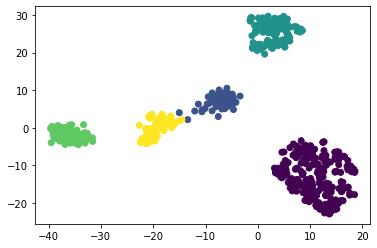

In [15]:
X_trans_KMeans = KMeans(n_clusters=5, n_init=10).fit_predict(X_trans_PCA[:,0:49])
plt.scatter(X_trans_TSNE[:,0], X_trans_TSNE[:,1], c=X_trans_KMeans)

Number of visually disctict clusters within one point cloud: 1

###  9. Elbow Method

As above, we continue to use the data projected onto the top $50$ PC's.

Use the elbow method to select a number of clusters. In other words, plot the K-Means clustering criterion $WGSS$ versus the number of clusters $K$, and find the number of cluster after the last big drop of the curve. (Different reasonable answers will be accepted.)

*Python tip*: You may use the inertia_ attribute of sklearn.cluster.KMeans for $WGSS$.

What is the value of the K-Means clustering criterion at the number of clusters you chose? (Enter your answer accurate to 2 significant figures.) 

In [16]:
max_no_cluster = 10
WGSS = np.empty((max_no_cluster,2))
for i in np.arange(1, max_no_cluster+1, 1):
    print(i)
    WGSS[i-1,0] = i
    WGSS[i-1,1] = KMeans(n_clusters=i, n_init=10).fit(X_trans_PCA[:,:49]).inertia_

1
2
3
4
5
6
7
8
9
10


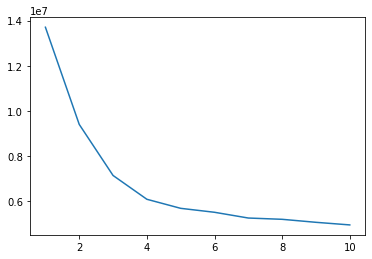

In [17]:
plt.plot(WGSS[:,0], WGSS[:,1])

In [18]:
WGSS

array([[1.00000000e+00, 1.37048046e+07],
       [2.00000000e+00, 9.39874026e+06],
       [3.00000000e+00, 7.13581024e+06],
       [4.00000000e+00, 6.08086770e+06],
       [5.00000000e+00, 5.67958716e+06],
       [6.00000000e+00, 5.50467081e+06],
       [7.00000000e+00, 5.24992871e+06],
       [8.00000000e+00, 5.19311805e+06],
       [9.00000000e+00, 5.06009510e+06],
       [1.00000000e+01, 4.94473417e+06]])

In [19]:
print("Number of clusters: 4")
print("The corresponding WGSS is: {}".format(WGSS[3,1]))

Number of clusters: 4
The corresponding WGSS is: 6080867.704973642


### 10. Small excursion to R - not mentioned here

### 11. Visualizing cluster means

Compute the mean value of the data points in each cluster that you found using K-means. For this computation of mean, use the data in full original dimensions instead of the PCA projections (so if the data matrix is $n \times d$ and you found $k$ clusters, your cluster means should be $k$ vectors in $d$ dimensions.)

Visualize the $k$ cluster means in 2-dimensional space using MDS and PCA. Which of the following best explains the difference between this plot and the T-SNE plot? (Choose all that apply.) 

### 12. What if We Did Not Transform Data

Now we consider what would have happened if we did not take a log transform of the data.

Perform the PCA, MDS, and T-SNE visualizations from parts 5 and 7 (with the same parameters) using the original data, before you took the log transform. Which plots look most like the plots you obtain?

Match the plots with the methods: 

<function matplotlib.pyplot.show(close=None, block=None)>

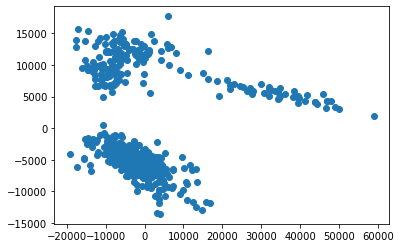

In [21]:
# PCA
pca = PCA(n_components=50)
X_PCA = pca_trans.fit_transform(X) 
plt.scatter(x=X_PCA[:,0], y=X_PCA[:,1])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

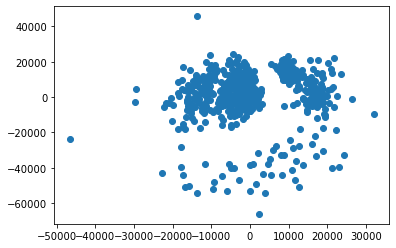

In [22]:
# MDS
mds = MDS(n_components=2)
X_MDS = mds.fit_transform(X)
plt.scatter(X_MDS[:,1], X_MDS[:,0])
plt.show

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 511 samples in 0.000s...
[t-SNE] Computed neighbors for 511 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 511 / 511
[t-SNE] Mean sigma: 2798.687192
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.032463
[t-SNE] KL divergence after 1000 iterations: 0.383597


<function matplotlib.pyplot.show(close=None, block=None)>

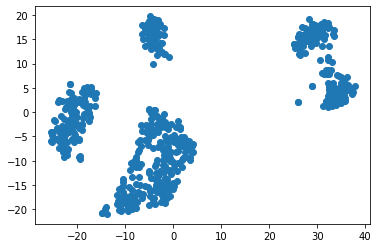

In [25]:
# TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40)
X_TSNE = tsne.fit_transform(X_PCA[:,0:49])
plt.scatter(X_TSNE[:,0], X_TSNE[:,1])
plt.show